<a href="https://colab.research.google.com/github/sucheerarighthere/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [1]:
import pandas as pd
import numpy as np
import json

In [304]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [305]:
 estimate= pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/คำตอบนักประเมิน(ID).xlsx') #นำเข้าตาราง คำตอบนักประเมินโดยการใช้ pd.read

In [306]:
estimate.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1.0,https://nayoo.co/khonkaen/posts/25,25.0,บ้านเดี่ยว,มั่นใจ,2890000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2.0,https://nayoo.co/khonkaen/posts/25,25.0,บ้านเดี่ยว,มั่นใจ,2890000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1.0,https://nayoo.co/khonkaen/posts/33,33.0,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2.0,https://nayoo.co/khonkaen/posts/33,33.0,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1.0,https://nayoo.co/khonkaen/posts/495,495.0,บ้านเดี่ยว,มั่นใจ,6050000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [307]:
estimate.columns

Index(['ID ผู้ประเมิน', 'post id', 'ID', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์'],
      dtype='object')

In [308]:
datahouse.columns

Index(['id', 'name_th', 'name_en', 'project_name', 'company', 'province',
       'district', 'sub_district', 'property_type', 'home improvement',
       'renovate', 'public utility', 'land type', 'land wide(m)',
       'land long(m)', 'topsoil', 'corner', 'zip_code', 'zone', 'alley',
       'street', 'latitude', 'longitude', 'number_of_rai', 'number_of_ngan',
       'number_of_va', 'construct_year', 'model', 'sell_price',
       'number_of_unit', 'number_of_story', 'number_of_bedroom',
       'number_of_bathroom', 'number_of_parking', 'usable_area',
       'central_cost', 'direction', 'furniture', 'building_number',
       'number_of_building', 'floor_number', 'parking_percentage', 'has_pool',
       'has_keycard', 'has_security', 'has_fitness', 'has_garden'],
      dtype='object')

In [309]:
datahouse = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/Data House.xlsx') #นำเข้าตารางdata house โดยการใช้ pd.read

In [ ]:
datahouse.head()

นำเข้า json file



In [311]:
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/7-eleven.json') as s:
  seven = json.loads(s.read()) # read json file

In [312]:
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/school.json') as f:
  school = json.loads(f.read())

# SEVEN

In [313]:
seven_id = {}#สร้างดิกขึ้นมาเก็บเพื่อจะดึงไอดีที่มีทั้งคู่ขึ้นมาเทียบ สร้างโปรแกรมสร้างลิสเข้ามาเก็บ ดูลูปดีๆว่าโดนรีเซ็ทไปหรือยัง
for t in seven:
    l = list()
    for x in seven[t]:
        l.append(x['geometry']['location'])
    print(t)    # T is id fromthis json file
    print(l) #l คือ ลลิสต์ที่เราสร้างมาเฉพาะในลูป
    seven_id[t]=l #dictนี้ ที่อินเด็กซ์เป็นตัวที(ไอดี)สมชิกของมันคือ [l]

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
6284
[]
6285
[{'lat': 16.3280289, 'lng': 102.8466104}]
6286
[]
6289
[]
6290
[]
6291
[{'lat': 16.760925, 'lng': 102.6348166}]
6292
[{'lat': 16.3280289, 'lng': 102.8466104}]
6296
[{'lat': 16.5219606, 'lng': 102.219816}]
6297
[]
6298
[{'lat': 16.4501543, 'lng': 102.7382279}, {'lat': 16.4481776, 'lng': 102.7736213}, {'lat': 16.4496233, 'lng': 102.7578029}, {'lat': 16.4512684, 'lng': 102.7517798}]
6302
[]
6306
[]
6310
[]
6311
[]
6313
[{'lat': 16.4506978, 'lng': 102.7955315}, {'lat': 16.4786388, 'lng': 102.814293}, {'lat': 16.4794698, 'lng': 102.8070934}, {'lat': 16.4423, 'lng': 102.808299}, {'lat': 16.4802561, 'lng': 102.8118345}, {'lat': 16.4800345, 'lng': 102.817991}, {'lat': 16.4800801, 'lng': 102.8157501}, {'lat': 16.4421359, 'lng': 102.8198991}, {'lat': 16.4781927, 'lng': 102.8199828}, {'lat': 16.4463944, 'lng': 102.8200097}]
6316
[]
6319
[{'lat': 16.7035329, 'lng': 103.0785806}, {'lat': 16.7009297, 'lng': 103.0838363}, {'lat': 1

In [314]:
school_id = {}#สร้างดิกขึ้นมาเก็บเพื่อจะดึงไอดีที่มีทั้งคู่ขึ้นมาเทียบ สร้างโปรแกรมสร้างลิสเข้ามาเก็บ ดูลูปดีๆว่าโดนรีเซ็ทไปหรือยัง
for s in school:
    l = list()
    for x in school[s]:
        l.append(x['geometry']['location'])
    print(s)    # s is id fromthis json file
    print(l) #l คือ ลลิสต์ที่เราสร้างมาเฉพาะในลูป
    school_id[s]=l #dictนี้ ที่อินเด็กซ์เป็ฯตัวที(ไอดี)สมชิกของมันคือ [l]

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
6087
[{'lat': 16.4810561, 'lng': 102.8317087}, {'lat': 16.4687957, 'lng': 102.8010787}, {'lat': 16.4969229, 'lng': 102.8329121}, {'lat': 16.4647151, 'lng': 102.8247331}, {'lat': 16.4716564, 'lng': 102.8263428}, {'lat': 16.4903517, 'lng': 102.8135589}, {'lat': 16.4799106, 'lng': 102.8178279}, {'lat': 16.47801, 'lng': 102.8203845}, {'lat': 16.4806252, 'lng': 102.8199806}, {'lat': 16.4804631, 'lng': 102.8197349}, {'lat': 16.4691493, 'lng': 102.8302428}, {'lat': 16.4697047, 'lng': 102.8302438}]
6088
[{'lat': 16.4810561, 'lng': 102.8317087}, {'lat': 16.4969229, 'lng': 102.8329121}, {'lat': 16.4687957, 'lng': 102.8010787}, {'lat': 16.472365, 'lng': 102.8258448}, {'lat': 16.4716564, 'lng': 102.8263428}, {'lat': 16.4903517, 'lng': 102.8135589}, {'lat': 16.4799106, 'lng': 102.8178279}, {'lat': 16.486048, 'lng': 102.8364063}, {'lat': 16.47801, 'lng': 102.8203845}, {'lat': 16.4806252, 'lng': 102.8199806}, {'lat': 16.4804631, 'lng': 102.8197

In [315]:
#ทดลองเรียกข้อมูลไอดีมาดูว่ามีตรงกันไหม
seven_id['29'] #seven มี

[{'lat': 16.4506978, 'lng': 102.7955315},
 {'lat': 16.4481776, 'lng': 102.7736213},
 {'lat': 16.4221806, 'lng': 102.8047853},
 {'lat': 16.4362708, 'lng': 102.7997081},
 {'lat': 16.4512089, 'lng': 102.795423},
 {'lat': 16.4379979, 'lng': 102.7868055},
 {'lat': 16.4423, 'lng': 102.808299},
 {'lat': 16.4210166, 'lng': 102.8099416}]

In [316]:
school_id['29'] #รร มี

[{'lat': 16.4241996, 'lng': 102.8015855},
 {'lat': 16.4215141, 'lng': 102.8077957},
 {'lat': 16.4357091, 'lng': 102.8052259},
 {'lat': 16.4481546, 'lng': 102.7874673},
 {'lat': 16.4430745, 'lng': 102.7928109},
 {'lat': 16.4352412, 'lng': 102.7731626},
 {'lat': 16.4214039, 'lng': 102.8074362},
 {'lat': 16.443305, 'lng': 102.792247},
 {'lat': 16.4354382, 'lng': 102.8058774},
 {'lat': 16.445288, 'lng': 102.7923799},
 {'lat': 16.4482063, 'lng': 102.7767689},
 {'lat': 16.4437682, 'lng': 102.7964501},
 {'lat': 16.4254774, 'lng': 102.802903},
 {'lat': 16.4535313, 'lng': 102.7963101}]

In [317]:
datahouse[datahouse['id']==29]

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
9,29.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลพฤกษ์กรีนวิลล์,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลพฤกษ์กรีนวิลล์,ชลพฤกษ์ เลควิลล์,ชลพฤกษ์ กรีนวิลล์,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ทดลองลูป

In [318]:
#ให้เปลี่ยนข้อมูลแค่จุดเดียวเพื่อจะลูปง่ายๆ
#เลือกบางไอดีมาก่อน ตอนนี้เลือกไอดีที่ 29

In [319]:
h_lat = datahouse['latitude'].values[0]
h_long = datahouse['longitude'].values[0]
#เพื่อให้ง่านต่อการวนลูปทดลองใส่เป็นตัวแปรไปก่อน

In [370]:
idsv=29

In [372]:
type(idsv)

int

In [373]:
thisseven = seven_id[str(int(idsv))]

In [375]:
thishome =datahouse[datahouse['id']==idsv]

In [399]:
thisseven #ถ้าขึ้นแสดงว่ามีข้อมูลตัวที่ 29

[{'lat': 16.4506978, 'lng': 102.7955315},
 {'lat': 16.4481776, 'lng': 102.7736213},
 {'lat': 16.4221806, 'lng': 102.8047853},
 {'lat': 16.4362708, 'lng': 102.7997081},
 {'lat': 16.4512089, 'lng': 102.795423},
 {'lat': 16.4379979, 'lng': 102.7868055},
 {'lat': 16.4423, 'lng': 102.808299},
 {'lat': 16.4210166, 'lng': 102.8099416}]

บ้านหนึ่งหลังยังต้องวนลูปเซเว่นอีก เพราะเราไม่รู้ว่าหนึ่งหลังมีกี่เซเว่น เราต้องเขียนลูปให้อ่านได้ทุกไอดี เพราะเราไม่รู้ว่าแต่ละไอดีกี่ค่า

In [377]:
# this_seven =[] = list should loop list 
for seven in thisseven:
  print(seven) #มันจะดึงเซเว่นแต่ละอันให้ดู

{'lat': 16.4506978, 'lng': 102.7955315}
{'lat': 16.4481776, 'lng': 102.7736213}
{'lat': 16.4221806, 'lng': 102.8047853}
{'lat': 16.4362708, 'lng': 102.7997081}
{'lat': 16.4512089, 'lng': 102.795423}
{'lat': 16.4379979, 'lng': 102.7868055}
{'lat': 16.4423, 'lng': 102.808299}
{'lat': 16.4210166, 'lng': 102.8099416}


In [378]:
import geopy.distance #libraly วัดระยะห่าง

In [379]:
#เราต้องทำสองขั้น เซเว่นในรัศมีต่างๆ
#ขั้นแรกคือคำนวณระยะทางระหว่างบ้าน กับเซเว่นแต่ละที่ 
seven_dist=list() #listว่างเพราะจะทำมาเก็บ 
loc1 = [h_lat,h_long] #เอาไว้นอกลูป เพราะแผนที่บ้านเราไม่ได้วนในลูป
for seven in thisseven:
  loc2 = [seven['lat'],seven['lng']]
  dist = geopy.distance.geodesic(loc1,loc2).m
  # print(dist) #ลองปริ้นออกมาดูว่ามีระยะห่างเท่าไหร่ 
  seven_dist.append(dist) # method is used for adding an item to the end of an existing list, without creating a new list

In [380]:
print(dist)

36539.77462771209


In [381]:
 seven_dist.append(dist) #นำ seven_dist เข้าไปอยู่ในลิสต์ทุกบ้าน

In [382]:
seven_dist #list can operate เป็นลิสต์ที่สามารถเอาไปบวกลบคูณหารต่อได้

[38656.55326304803,
 37398.0384741392,
 36366.08127652315,
 37452.877731070585,
 38701.719840444006,
 36981.83871137629,
 38481.726187913904,
 36539.77462771209,
 36539.77462771209]

ตารางเซเว่น

In [383]:
#datahouse_new = datahouse[['renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]
#datahouse_new

In [384]:
np.array(seven_dist)<500 #แปลงลิวต์ออกมาให้เป็น numpy arrays เพื่อให้มันมีคุณสมบัติเมทริกซ์มากขึ้น 
#ผลออกมาไม่มีเซเว่นที่มีระยะห้างน้อยกว่า 500เมตรเลย

array([False, False, False, False, False, False, False, False, False])

In [385]:
# เราสามารถเรียกมาดูได้เฉพาะค่าที่เราต้องการด้วยการ  summary
sum(np.array(seven_dist)<500) 

0

เราจะสร้างตารางด้วย pandas  Creationn pandas dataframe

In [386]:
#code สร้าง ลิสต์
record_list=list() #just 1 rec
record_dict = {}
record_dict['id'] = int(id) #ข้างใน[]เป็นชื่อคีย์เฉยๆ #ข้อมูลเป็น int อยู่แล้ว
record_dict['d250-7/11'] = sum(np.array(seven_dist)<250)
record_dict['d500-7/11'] = sum(np.array(seven_dist)<500)
record_dict['d750-7/11'] = sum(np.array(seven_dist)<750)
record_dict['d1000-7/11'] = sum(np.array(seven_dist)<1000)
record_dict['d1250-7/11'] = sum(np.array(seven_dist)<1250)
record_dict['d1500-7/11']= sum(np.array(seven_dist)<1500)
record_dict['d2000-7/11']= sum(np.array(seven_dist)<2000)

In [388]:
pd.DataFrame(record_list) #เราต้องรู้ว่าเตรียมอะไรมาถึงจะสร้างเป็น dataFrame ได้

,id,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,d2000-7/11
0,1,0,0,0,0,0,0,0


## Loop by id SEVEN

In [389]:
def cal_seven_redius(seven_dist,radius):
  num=0
  for seven in seven_dist:
    if seven < radius:
      num = num+1
  return num

##loop บ้านทั้งหมด
เราต้องการให้วนลูปในโฮม

In [402]:
h_lat = thishome['latitude'].values[0]
h_long = thishome['longitude'].values[0]

In [403]:
id=25 #เอาไอดีเซเว่นเป็นหลัก #เอาไอดีเป็น int จะอินพุทเป็นอะไรกันแน่ str,int

In [405]:
thishome =datahouse[datahouse['id']==id]
thishome

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
7,25.0,บ้านเดี่ยว เมืองขอนแก่น โครงการกันยารัตน์ เดอว...,บ้านเดี่ยว เมืองขอนแก่น โครงการกันยารัตน์ เดอว...,กันยารัตน์ เดอะวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [412]:
thisseven = seven_id['25'] #แสดงว่าอันนี้ยังเป็น string อยู่
thisseven

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

In [426]:
this_seven = seven_id[str(int(id))] 

In [430]:
this_seven = seven_id[str(int(25))] 

In [431]:
this_seven

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

In [439]:
print(list(thisseven))

[{'lat': 16.4229267, 'lng': 102.8712313}, {'lat': 16.4255945, 'lng': 102.8397278}, {'lat': 16.4251666, 'lng': 102.8510168}, {'lat': 16.4075683, 'lng': 102.8597974}, {'lat': 16.4198307, 'lng': 102.8496996}, {'lat': 16.4236724, 'lng': 102.8434961}, {'lat': 16.4059038, 'lng': 102.839094}, {'lat': 16.4276489, 'lng': 102.867949}, {'lat': 16.4276748, 'lng': 102.8632914}, {'lat': 16.4285371, 'lng': 102.8496085}, {'lat': 16.4187106, 'lng': 102.8405019}, {'lat': 16.4289683, 'lng': 102.8471979}, {'lat': 16.4288908, 'lng': 102.8559018}, {'lat': 16.4288377, 'lng': 102.8542497}, {'lat': 16.3990089, 'lng': 102.8381851}, {'lat': 16.4289572, 'lng': 102.8477644}, {'lat': 16.4268631, 'lng': 102.8371875}]


In [440]:
type(seven_id[id])

KeyError: ignored

# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

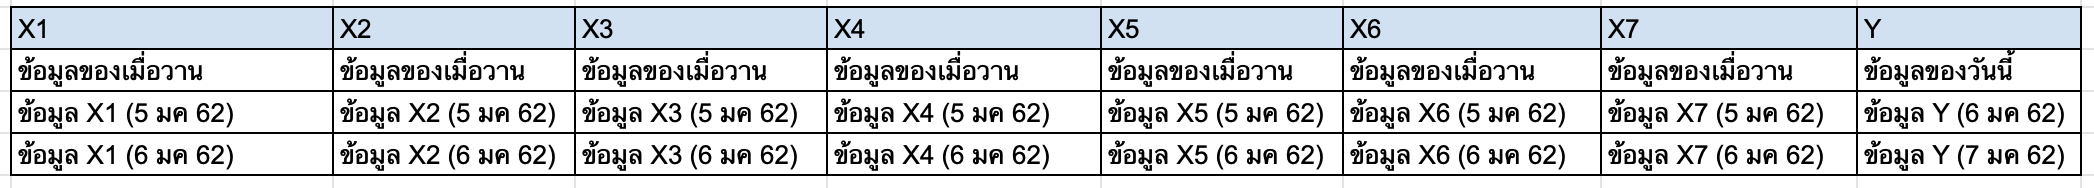

